In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0'

In [3]:
keras.__version__

'2.3.0-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [7]:
class_names = ['T-shirt?top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
class_names[y_train[0]]

'Coat'

In [8]:
model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28,28]),
      keras.layers.Dense(300, activation='relu'),
      keras.layers.Dense(100, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [12]:
weights.shape

(784, 300)

In [13]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
weights

array([[ 0.00886969,  0.00287732, -0.07069585, ..., -0.01416587,
        -0.04353247, -0.00365838],
       [ 0.0544468 , -0.05339578, -0.04245731, ...,  0.03659278,
         0.0606517 , -0.00400972],
       [ 0.06690048,  0.00326054, -0.01309655, ...,  0.00107963,
         0.06072859,  0.0434777 ],
       ...,
       [ 0.00872032,  0.00693405, -0.04008198, ..., -0.02668055,
         0.0397388 , -0.05677897],
       [-0.02690158, -0.02475772, -0.02403016, ...,  0.01958195,
        -0.00804368, -0.07386411],
       [ 0.01663513, -0.05353361,  0.0394589 , ...,  0.01767834,
         0.06329077, -0.02135336]], dtype=float32)

In [15]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [16]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7214 - sparse_categorical_accuracy: 0.7654 - val_loss: 0.5154 - val_sparse_categorical_accuracy: 0.8236
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4887 - sparse_categorical_accuracy: 0.8305 - val_loss: 0.4400 - val_sparse_categorical_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4428 - sparse_categorical_accuracy: 0.8455 - val_loss: 0.4166 - val_sparse_categorical_accuracy: 0.8578
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4156 - sparse_categorical_accuracy: 0.8553 - val_loss: 0.3988 - val_sparse_categorical_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3957 - sparse_categorical_accuracy: 0.8616 - val_loss: 0.3820 - val_sparse_categorical_accuracy: 0.8718
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3795 - spars

In [17]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [18]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [19]:
history.history

{'loss': [0.7213501334190369,
  0.48871681094169617,
  0.44283327460289,
  0.4156033396720886,
  0.39565351605415344,
  0.37950870394706726,
  0.3650378882884979,
  0.35484400391578674,
  0.34392791986465454,
  0.3349229097366333,
  0.3265354633331299,
  0.3189743459224701,
  0.31174370646476746,
  0.3044811487197876,
  0.2982212007045746,
  0.29198697209358215,
  0.286248117685318,
  0.2805648148059845,
  0.2758924961090088,
  0.2703167796134949,
  0.2643567621707916,
  0.26058077812194824,
  0.25527694821357727,
  0.25174108147621155,
  0.24714842438697815,
  0.24261079728603363,
  0.2385772317647934,
  0.2348022609949112,
  0.2319701462984085,
  0.22703225910663605],
 'sparse_categorical_accuracy': [0.7653818130493164,
  0.8305090665817261,
  0.8454909324645996,
  0.8552545309066772,
  0.861618161201477,
  0.866636335849762,
  0.8714545369148254,
  0.8732908964157104,
  0.8771091103553772,
  0.8809636235237122,
  0.8827999830245972,
  0.8856182098388672,
  0.8878181576728821,
  0.89

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

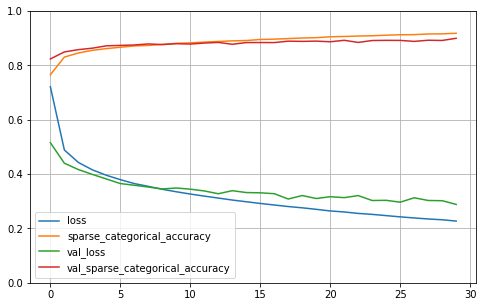

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 65.8136 - sparse_categorical_accuracy: 0.8453


[65.81355285644531, 0.845300018787384]

In [23]:
x_new = x_test[:3]
y_probability = model.predict(x_new)
y_probability.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
model.predict_classes(x_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)